In [151]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import yfinance as yf 
from prophet import Prophet
from prophet.plot import plot_components

In [152]:
symbol = 'AAPL'
data = yf.download(symbol,start='2019-01-01',end='2023-01-01',progress=False)

In [153]:
df = pd.DataFrame({'ds':data.index,'y':data['Close']})

In [154]:
df.head()

,ds,y
Date,,
2019-01-02,2019-01-02,39.480000
2019-01-03,2019-01-03,35.547501
2019-01-04,2019-01-04,37.064999
2019-01-07,2019-01-07,36.982498
2019-01-08,2019-01-08,37.687500


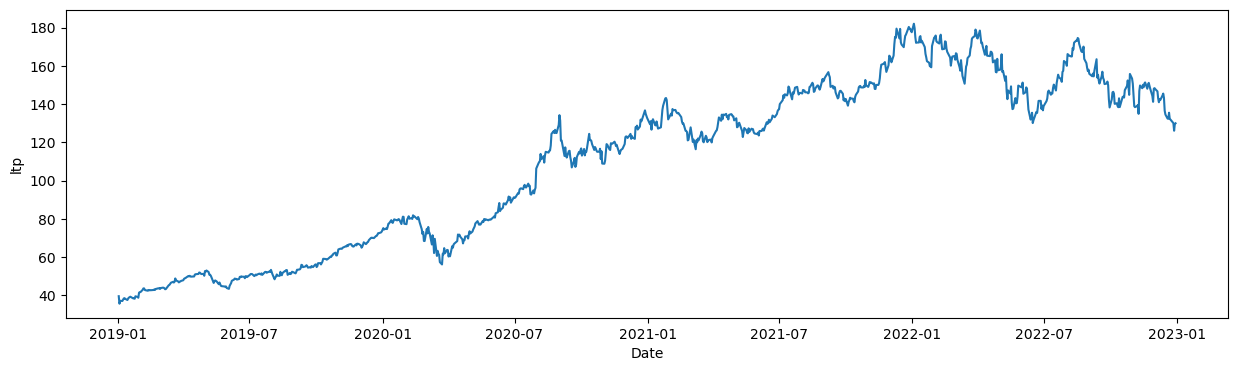

In [155]:
plt.figure(figsize=(15,4))
plt.plot(df['ds'],df['y'])
plt.xlabel('Date')
plt.ylabel('ltp')
plt.show()

In [156]:
df.shape

(1008, 2)

In [157]:
# we will be using 80% of data for training and remaining 20% will be used for the testing purpose
train_size = int(len(df)*0.8)
train , test = df[:train_size],df[train_size:]

In [158]:
print(train_size)

806


In [159]:
train.shape

(806, 2)

In [160]:
test.shape

(202, 2)

In [161]:
train.tail()

,ds,y
Date,,
2022-03-08,2022-03-08,157.440002
2022-03-09,2022-03-09,162.949997
2022-03-10,2022-03-10,158.520004
2022-03-11,2022-03-11,154.729996
2022-03-14,2022-03-14,150.619995


In [162]:
test.head()

,ds,y
Date,,
2022-03-15,2022-03-15,155.089996
2022-03-16,2022-03-16,159.589996
2022-03-17,2022-03-17,160.619995
2022-03-18,2022-03-18,163.979996
2022-03-21,2022-03-21,165.380005


In [163]:
model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
model.fit(train)

21:52:41 - cmdstanpy - INFO - Chain [1] start processing
21:52:42 - cmdstanpy - INFO - Chain [1] done processing


In [164]:
test.tail()

,ds,y
Date,,
2022-12-23,2022-12-23,131.860001
2022-12-27,2022-12-27,130.029999
2022-12-28,2022-12-28,126.040001
2022-12-29,2022-12-29,129.610001
2022-12-30,2022-12-30,129.929993


In [165]:
future = model.make_future_dataframe(periods=len(test),freq='D')

In [166]:
forecast = model.predict(future)

In [167]:
forecast[['yhat','yhat_upper','yhat_lower']]

,yhat,yhat_upper,yhat_lower
0,37.921014,42.748123,33.205821
1,37.742506,42.764182,33.005301
2,37.716275,42.335241,32.883696
3,37.788923,42.735522,33.020713
4,38.027446,42.571777,32.774075
...,...,...,...
1003,179.959508,197.320855,162.536817
1004,179.817093,195.779654,163.243588
1005,179.902960,197.058691,163.011855
1006,182.260878,199.627941,165.358971


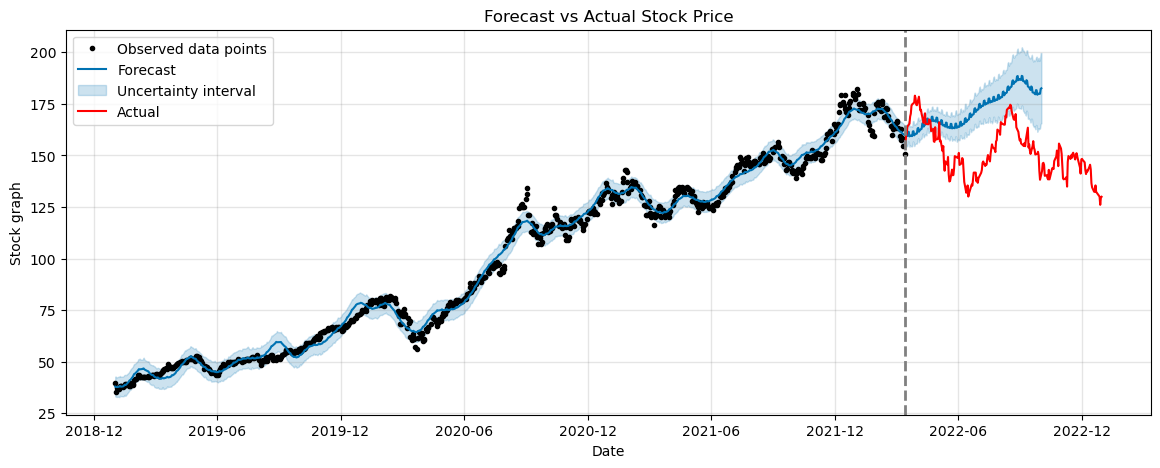

In [168]:
fig,ax = plt.subplots(figsize=(14,5))
model.plot(forecast,ax=ax , xlabel='Date',ylabel='Stock graph' ,plot_cap=False,uncertainty=True)
ax.plot(test.index,test['y'],label = 'Actual',color='red')
ax.set_title('Forecast vs Actual Stock Price')
ax.axvline(test.index[0],color='grey',linestyle='--',lw=2)
plt.legend()
plt.show()